# **Tarea de Joblib**

Javier Nieto Merodio
ITAM 2023 FDD

## **0. Import de librerías**

In [113]:
import matplotlib.pyplot as plt
import os
import requests
import numpy as np  
import urllib.request
from joblib import Parallel, delayed
import time
import pandas as pd

## **1. Import de las imágenes a un arreglo**

In [2]:
array_img = np.loadtxt("20_images.txt", dtype="str")
array_img

array(['https://i.ytimg.com/vi/bDPkImgNs8Y/maxresdefault.jpg',
       'https://e00-marca.uecdn.es/albumes/2014/11/18/comics_nba/1416295630_extras_albumes_0_980.jpg',
       'https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/fairy-tail-natsu-padres-1559572361.png',
       'https://static.wikia.nocookie.net/fairytail/images/b/bf/830px-You_like_him.jpg/revision/latest?cb=20120127154134&path-prefix=es',
       'https://static.wikia.nocookie.net/doblaje/images/7/7c/Dragon-Ball-Z.png/revision/latest?cb=20200911193425&path-prefix=es',
       'https://depor.com/resizer/EkdERO36Wj8BqMsc67Kd20z2f0U=/1200x1200/smart/filters:format(jpeg):quality(75)/cloudfront-us-east-1.images.arcpublishing.com/elcomercio/NRFDECK2RBDCTKHGOOT5XJQEDI.jpg',
       'https://www.rd.com/wp-content/uploads/2019/01/shutterstock_673465372.jpg?fit=700,467',
       'https://images.unsplash.com/photo-1611267254323-4db7b39c732c?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8M3x8Y3V0ZSUyMGNhdHxlbnwwfHwwfHw%3D&w=1000&q=8

Descarga de las imágenes y salvado en un arreglo

In [3]:
folder_imgs = './img'
filenames = []

for url in array_img:
    response = requests.get(url)
    filename = url.split('/')[-1]
    with open(os.path.join(folder_imgs, filename), 'wb') as f:
        f.write(response.content)
    filenames.append(filename)

Prueba de funcionamiento

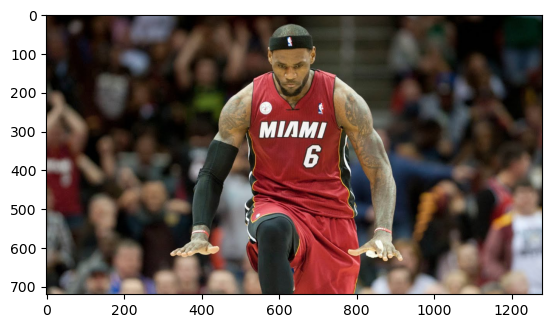

In [6]:
imagen_prueba=plt.imread(folder_imgs + "/" +filenames[0])
plt.imshow(imagen_prueba)
plt.show()

## **2. Transformas imágenes a vectores**

In [7]:
# Muestra de qué hay que hacer

imagen_prueba= plt.imread(folder_imgs + "/" +filenames[0])
imagen_prueba = np.array(imagen_prueba)
print(imagen_prueba.shape)
imagen_prueba
     

(720, 1280, 3)


array([[[ 60,  38,  27],
        [ 57,  37,  26],
        [ 56,  36,  25],
        ...,
        [ 51,  74,  80],
        [ 50,  74,  78],
        [ 49,  73,  75]],

       [[ 60,  38,  27],
        [ 57,  37,  26],
        [ 56,  36,  25],
        ...,
        [ 51,  74,  80],
        [ 49,  73,  77],
        [ 48,  72,  76]],

       [[ 60,  38,  27],
        [ 59,  37,  26],
        [ 56,  36,  25],
        ...,
        [ 49,  72,  80],
        [ 47,  70,  76],
        [ 47,  71,  75]],

       ...,

       [[ 82,  77,  57],
        [ 80,  75,  55],
        [ 78,  73,  54],
        ...,
        [185, 198, 217],
        [185, 198, 217],
        [185, 198, 217]],

       [[ 93,  88,  68],
        [ 90,  85,  65],
        [ 86,  79,  60],
        ...,
        [182, 197, 216],
        [182, 197, 216],
        [182, 197, 216]],

       [[100,  95,  75],
        [ 96,  91,  71],
        [ 91,  84,  65],
        ...,
        [182, 197, 216],
        [181, 196, 215],
        [181, 196, 215]]

In [8]:
filenames

['maxresdefault.jpg',
 '1416295630_extras_albumes_0_980.jpg',
 'fairy-tail-natsu-padres-1559572361.png',
 'latest?cb=20120127154134&path-prefix=es',
 'latest?cb=20200911193425&path-prefix=es',
 'NRFDECK2RBDCTKHGOOT5XJQEDI.jpg',
 'shutterstock_673465372.jpg?fit=700,467',
 'photo-1611267254323-4db7b39c732c?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8M3x8Y3V0ZSUyMGNhdHxlbnwwfHwwfHw%3D&w=1000&q=80',
 '20523050.png',
 '41b9u-1yUVS._AC_.jpg',
 'cthulhu-2.jpg?w=640',
 'il_1080xN.3926159075_hj39.jpg',
 'fan-art-chihiro-7.jpg',
 '557b36ec0911375e91f88c45b9e30a92--batman-animado-chibi.jpg',
 'il_fullxfull.4384629284_5nk6.jpg',
 'CEIJaGZP_400x400.jpg',
 'latest?cb=20160511154723&path-prefix=es',
 'tvkk3sxgp8181.png',
 'Ew7fd58XIAIvPRs.png',
 'eed60545d30bafa2dd7ce23e9c076801--los-simpsons-cartoon-characters.jpg',
 'elephant-297205_960_720-768x558.png',
 'D_NQ_NP_2X_947005-MLM49480089581_032022-F.jpg',
 '787.jpg?w=1000&ssl=1',
 'road-1072823_1280.jpg',
 '0144502500_gtr_cntbdyright_001_nr_1024x1024

In [12]:
# Función que vectoriza imágenes

def vectorizar(x): 
    try:
        return plt.imread(x)
    except:
        pass

In [14]:
# Vectorizar todas las imágenes y guardarlas en un vector de forma paralelizada

imagenes_vectorizadas = Parallel(n_jobs= 4)(delayed(vectorizar)(folder_imgs + "/" + i) for i in filenames)

In [71]:
# Eliminar links rotos

a_quitar = [6, 18, 33]
imgs_vectorizadas = np.delete(imagenes_vectorizadas, a_quitar)



/root/miniconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [72]:
len(imgs_vectorizadas)

37

## **3 y 4. Obtener el primer color de la imagen y cambiarlo**

Para probar más la paralelización, haré el cambio de color de la imagen y el acceso a la misma en una misma función y corrida paralelizada.

In [119]:
# Función para eliminar un color aleatorio (cambiarlo)

def cambiar_color(img):
    copy = img.copy()
    random_num = np.random.randint(0, 2)
    color_viejo = copy[0, 0, random_num]
    color_nuevo = np.random.uniform(0, 255)
    copy[:, :, random_num] = color_nuevo
    return copy, color_viejo, color_nuevo


In [120]:
# Paralelizar cambios de color

imagenes_nuevas, colores_viejos, colores_nuevos = zip(*Parallel(n_jobs=4)(delayed(cambiar_color)(i) for i in imgs_vectorizadas)) 

# Usé la función zip para poder regresar correctamente tres valores. Noté muchísimo la paralelización aquí

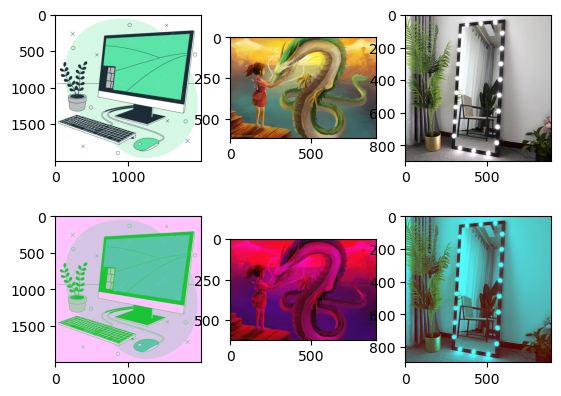

In [131]:
# Grafiquemos 3 imágenes cambiadas para ver el cambio

# Crear espacio
fig, axes = plt.subplots(nrows=2, ncols=3)

# Las tres gráficas
axes[0, 0].imshow(imgs_vectorizadas[31])
axes[1, 0].imshow(imagenes_nuevas[31])
axes[0, 1].imshow(imgs_vectorizadas[11])
axes[1, 1].imshow(imagenes_nuevas[11])
axes[0, 2].imshow(imgs_vectorizadas[29])
axes[1, 2].imshow(imagenes_nuevas[29])


# Show the figure
plt.show()

## **5. Crear dataframe con links, antiguo color y nuevo color**

In [132]:
# Modificar la lista de links para eliminar las tres imágenes que no corrían

urls = np.delete(array_img, a_quitar)

In [142]:
# Crear dataframe


# Diccionario de datos
datos = {'url': urls, 'oldcolor': colores_viejos, 'newcolor': colores_nuevos}

# Create a DataFrame from the dictionary
df = pd.DataFrame(datos)

In [143]:
# Enseñar el head del df

df.head()

,url,oldcolor,newcolor
0,https://i.ytimg.com/vi/bDPkImgNs8Y/maxresdefau...,38.000000,63.741916
1,https://e00-marca.uecdn.es/albumes/2014/11/18/...,255.000000,58.771942
2,https://hips.hearstapps.com/hmg-prod.s3.amazon...,0.000000,152.617193
3,https://static.wikia.nocookie.net/fairytail/im...,253.000000,252.749290
4,https://static.wikia.nocookie.net/doblaje/imag...,0.627451,11.291881


## **6. Crear una columna de diferencias de colores**

In [145]:
# Función

def resta(a, b):
    return a - b

In [152]:
# Resultado de paralelización

diff = Parallel(n_jobs=4)(delayed(resta)(colores_viejos[i], colores_nuevos[i]) for i in range(len(colores_viejos)))
diff = np.array(diff)

In [154]:
# Poner resultado en df

df['diffcolor'] = diff

In [155]:
df

,url,oldcolor,newcolor,diffcolor
0,https://i.ytimg.com/vi/bDPkImgNs8Y/maxresdefau...,38.000000,63.741916,-25.741916
1,https://e00-marca.uecdn.es/albumes/2014/11/18/...,255.000000,58.771942,196.228058
2,https://hips.hearstapps.com/hmg-prod.s3.amazon...,0.000000,152.617193,-152.617193
3,https://static.wikia.nocookie.net/fairytail/im...,253.000000,252.749290,0.250710
4,https://static.wikia.nocookie.net/doblaje/imag...,0.627451,11.291881,-10.664430
5,https://depor.com/resizer/EkdERO36Wj8BqMsc67Kd...,149.000000,8.859298,140.140702
6,https://images.unsplash.com/photo-161126725432...,95.000000,103.689722,-8.689722
7,https://wallpaper.dog/large/20523050.png,0.462745,181.851847,-181.389102
8,https://m.media-amazon.com/images/I/41b9u-1yUV...,255.000000,76.852152,178.147848
9,https://alejandrolabonneblog.files.wordpress.c...,35.000000,214.383919,-179.383919


Fin de la tarea.